In [51]:
import numpy as np
import pandas as pan
import matplotlib.pyplot as plot
%matplotlib inline
import seaborn as sns

# Read Oxygen Saturation Dataset
df = pan.read_csv('oxygen_saturation.txt', sep="\t", header=0)
# Add the absolute value of the differnce between the two methods
df['diff'] = (df['pos'] - df['osm']).abs()
print(df)

    pos   osm  diff
0   100  99.7   0.3
1   100  99.8   0.2
2    99  99.1   0.1
3    99  99.7   0.7
4    99  98.5   0.5
..  ...   ...   ...
67   74  75.0   1.0
68   74  75.6   1.6
69   78  77.0   1.0
70   77  77.6   0.6
71   76  74.8   1.2

[72 rows x 3 columns]


In [52]:
df.describe()

,pos,osm,diff
count,72.000000,72.000000,72.000000
mean,89.083333,89.495833,1.095833
std,8.762516,8.695837,0.648821
min,70.000000,70.900000,0.000000
25%,82.000000,83.500000,0.600000
50%,89.500000,91.200000,1.050000
75%,97.000000,96.950000,1.600000
max,100.000000,99.800000,2.500000


(68.0, 102.0)

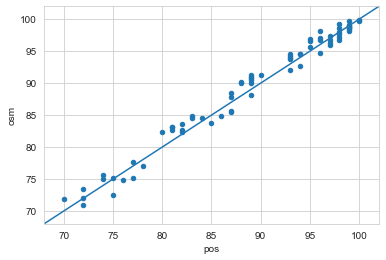

In [53]:
df.plot.scatter(x = 'pos', y = 'osm')
plot.axline([0, 0], [1, 1])
plot.xlim(68, 102)
plot.ylim(68, 102)

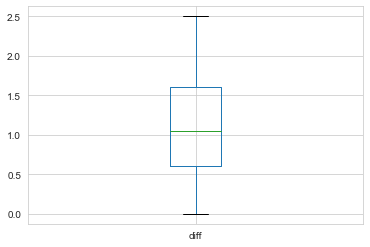

In [54]:
df.boxplot(column='diff', return_type='axes');
# These plots are not in perfect agreement, since all of the differences do not equal zero. 

In [ ]:
# Since the methods will be in perfect agreement if the differences equal zero,
# we can assume that as the TDI decreases, the likelihood that the methods are in agreement increases. 

In [ ]:
# Estimator = 2.1

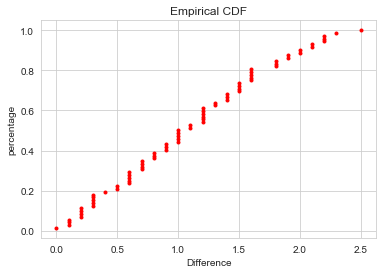

In [61]:
def get_ecdf(data):
    # Get lenght of the data into n
    n = len(data)
    
    # We need to sort the data
    x = np.sort(data)
    
    # the function will show us cumulative percentages of corresponding data points
    y = np.arange(1,n+1)/n
    
    return x,y

# Create a function to plot ecdf
def plot_ecdf(data,labelx,labely,title,color):
    # Call get_ecdf function and assign the returning values
    x, y = get_ecdf(data)
    
    plot.plot(x,y,marker='.',linestyle='none',c=color)
    plot.xlabel(labelx)
    plot.ylabel(labely)
    plot.title(title)
    
# Plotting Empirical CDF
plot_ecdf(df['diff'],"Difference","percentage","Empirical CDF","r")
plot.show()

C:\Users\kstre_3ikvnbf\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


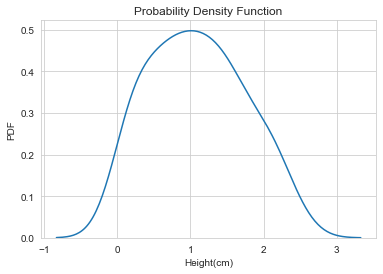

In [64]:
sns.distplot(df['diff'],hist=False)
plot.xlabel("Difference")
plot.ylabel("PDF")
plot.title("Probability Density Function")
plot.show()

In [67]:
def draw_bs_replicates(data,func,size):
    """creates a bootstrap sample, computes replicates and returns replicates array"""
    # Create an empty array to store replicates
    bs_replicates = np.empty(size)
    
    # Create bootstrap replicates as much as size
    for i in range(size):
        # Create a bootstrap sample
        bs_sample = np.random.choice(data,size=len(data))
        # Get bootstrap replicate and append to bs_replicates
        bs_replicates[i] = func(bs_sample)
    
    return bs_replicates

bs_replicates_diff = draw_bs_replicates(df['diff'],np.mean,15000)

# Print empirical mean
print("Empirical mean: " + str(df['diff'].mean()))

# Print the mean of bootstrap replicates
print("Bootstrap replicates mean: " + str(np.mean(bs_replicates_diff)))

Empirical mean: 1.0958333333333328
Bootstrap replicates mean: 1.0976192592592586


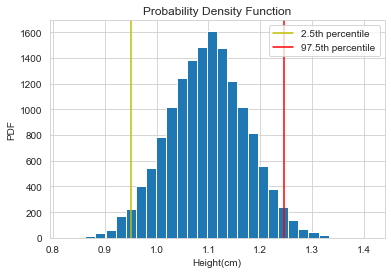

In [73]:
# Plot the PDF for bootstrap replicates as histogram
plot.hist(bs_replicates_diff,bins=30)

# Showing the related percentiles
plot.axvline(x=np.percentile(bs_replicates_diff,[2.5]), ymin=0, ymax=1,label='2.5th percentile',c='y')
plot.axvline(x=np.percentile(bs_replicates_diff,[97.5]), ymin=0, ymax=1,label='97.5th percentile',c='r')

plot.xlabel("Difference")
plot.ylabel("PDF")
plot.title("Probability Density Function")
plot.legend()
plot.show()

In [75]:
# Get the corresponding values of 2.5th and 97.5th percentiles
conf_interval = np.percentile(bs_replicates_diff,[2.5,97.5])

# Print the interval
print("The confidence interval: ",conf_interval)

The confidence interval:  [0.95       1.24583333]


In [88]:
population = df['diff']

In [89]:
population.mean()

1.0958333333333328

In [90]:
population.std()

0.6488207070209422

In [91]:
sample = np.random.choice(population, size=30)
sample

array([0.2, 1.8, 2.1, 0.2, 1.2, 1.5, 1.5, 0.6, 0.6, 0.3, 0.9, 1.8, 0.3,
       0.9, 0.6, 0.6, 0.6, 0.5, 2.1, 0.7, 0. , 1.2, 0.7, 0.4, 0.6, 0.3,
       1. , 2. , 1. , 2.2])

In [94]:
sample_mean = sample.mean()
sample_mean

0.9466666666666659

In [95]:
sample_std = np.std(sample, ddof=1)
sample_std

0.6473997503719081

In [98]:
sample_std/(30 ** 0.5)

0.11819848233396921

In [99]:
population.std()/(30 ** 0.5)

0.11845791233727351

In [101]:
boot_means = []
for _ in range(10000):
    bootsample = np.random.choice(sample,size=30, replace=True)
    boot_means.append(bootsample.mean())
# simulated mean of mean
bootmean = np.mean(boot_means)
# simulated standard deviation of mean
bootmean_std = np.std(boot_means)
# simulated mean VS true mean
(population.mean(), bootmean)

(1.0958333333333328, 0.947337666666666)

In [102]:
# the theorical standard error and simulated standard error
(population.std()/(30 ** 0.5), bootmean_std)

(0.11845791233727351, 0.11725454638473032)

(array([  47.,  306., 1022., 2090., 2583., 2144., 1221.,  432.,  128.,
          27.]),
 array([0.58333333, 0.662     , 0.74066667, 0.81933333, 0.898     ,
        0.97666667, 1.05533333, 1.134     , 1.21266667, 1.29133333,
        1.37      ]),
 <BarContainer object of 10 artists>)

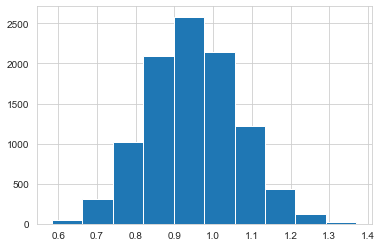

In [104]:
plot.hist(boot_means)

In [118]:
# Bootstrap method
from scipy.stats import bootstrap
data = (df,)
res = bootstrap(data, np.median, confidence_level = .95, random_state = 0, method = 'percentile')
res.confidence_interval

ConfidenceInterval(low=array([87.5 , 88.25,  0.85]), high=array([94.  , 94.6 ,  1.25]))

In [119]:
res.standard_error

array([2.11354992, 1.70160525, 0.1144769 ])

In [ ]:
# Over all the extent of agreement between these two methods are well enough to be interchangable
# Since the confidence intervals, means, and standard errors were close to each other. 